In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import os
import time
import re

In [ ]:
import pandas as pd

input_excel_file = 'news_share_data.xlsx'
output_csv_file = 'news_share_data.csv'

# Read the Excel file
df = pd.read_excel('news_share_data.xlsx')

# Save as CSV
df.to_csv('news_share_data.csv', index=False)

In [ ]:
# Load the dataset
df = pd.read_csv('news_share_data.csv')

df.head(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [ ]:
df.tail(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,2014-04-17,0.606557,6,2,0,4.913978,4,...,5709.823,4020.608,1950.0,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,2014-04-17,0.491018,4,2,0,4.674627,6,...,4352.491,2358.572,4200.0,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,2014-04-17,0.634518,3,0,2,4.177665,9,...,6060.771,3296.052,3400.0,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,2014-04-17,0.447368,7,1,0,4.667961,8,...,4763.083,2709.129,0.0,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900
1002,7003062,Not in 'Twilight' Anymore: Robert Pattinson Ba...,Held at gunpoint after his brother abandoned h...,2014-04-17,0.480412,5,2,0,4.429126,5,...,3610.125,2717.930,1100.0,0.296896,0.082484,0.029126,0.023301,0.333333,0.250000,949


**Checking the types of data**

In [ ]:
df.dtypes

article_id                      int64
title                          object
text                           object
published_date                 object
unique_tokens_rate            float64
num_hrefs                       int64
num_imgs                        int64
num_videos                      int64
average_token_length          float64
num_keywords                    int64
data_channel                   object
min_avg_key                   float64
max_avg_key                   float64
avg_avg_key                   float64
href_avg_shares               float64
global_subjectivity           float64
global_sentiment_polarity     float64
global_rate_positive_words    float64
global_rate_negative_words    float64
title_subjectivity            float64
title_sentiment_polarity      float64
shares                          int64
dtype: object

**Dropping irrelevant columns**

In [ ]:
df = df.drop(['min_avg_key', 'max_avg_key', 'href_avg_shares', 'title_sentiment_polarity'], axis=1)
df.head(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,avg_avg_key,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,3370.415,0.403762,0.038762,0.036735,0.024490,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,2556.367,0.410707,0.180934,0.044944,0.003745,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,3018.167,0.397545,0.044864,0.035294,0.019608,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,1871.403,0.491578,0.157620,0.047809,0.011952,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,5155.323,0.628535,0.078497,0.053763,0.034946,0.00,3000


**Renaming the columns**

In [ ]:
df = df.rename(columns={"num_hrefs": "hrefs", "num_imgs": "images", "num_videos": "videos", "num_keywords": "keywords"})
df.head(5)

,article_id,title,text,published_date,unique_tokens_rate,hrefs,images,videos,average_token_length,keywords,data_channel,avg_avg_key,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,3370.415,0.403762,0.038762,0.036735,0.024490,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,2556.367,0.410707,0.180934,0.044944,0.003745,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,3018.167,0.397545,0.044864,0.035294,0.019608,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,1871.403,0.491578,0.157620,0.047809,0.011952,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,5155.323,0.628535,0.078497,0.053763,0.034946,0.00,3000


**Detecting Outliers**

<Axes: xlabel='images'>

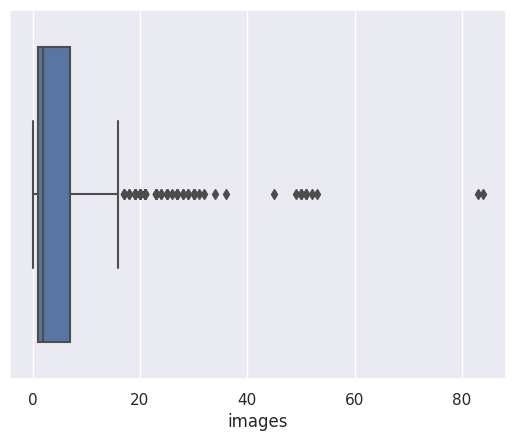

In [ ]:
sns.boxplot(x=df['images'])

<Axes: xlabel='hrefs'>

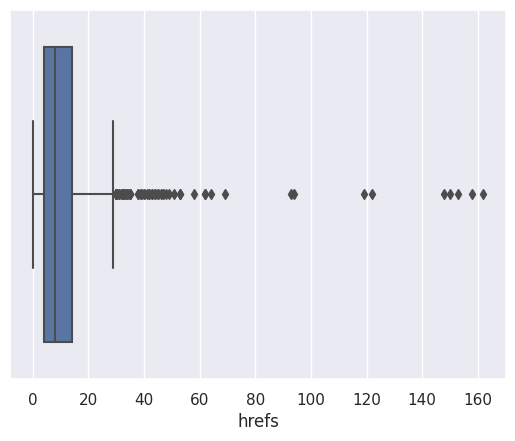

In [ ]:
sns.boxplot(x=df['hrefs'])

<Axes: xlabel='keywords'>

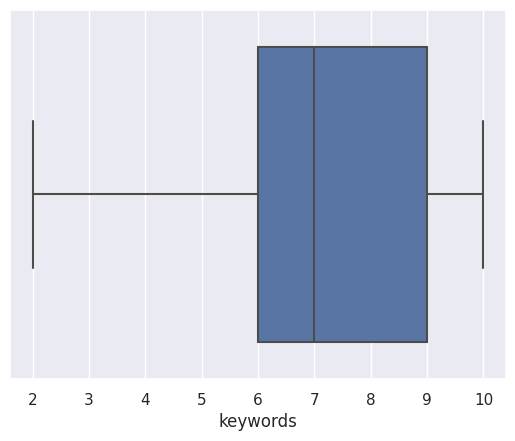

In [ ]:
sns.boxplot(x=df['keywords'])

In [ ]:
# Treating outliers in the numeric columns
cols_to_treat = ['hrefs','shares']

print("\nDistribution (raw):")
display(df[cols_to_treat].describe())

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    df = clip_outliers(df,col)


print("\nDistribution (after outlier treatment):")
display(df[cols_to_treat].describe())


Distribution (raw):


,hrefs,shares
count,1003.000000,1003.000000
mean,11.720837,4247.304088
std,15.181597,22609.634435
min,0.000000,58.000000
25%,4.000000,1000.000000
50%,8.000000,1600.000000
75%,14.000000,3100.000000
max,162.000000,663600.000000



Distribution (after outlier treatment):


,hrefs,shares
count,1003.000000,1003.000000
mean,10.395813,2801.232303
std,8.264578,2956.119061
min,0.000000,58.000000
25%,4.000000,1000.000000
50%,8.000000,1600.000000
75%,14.000000,3100.000000
max,33.000000,12290.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

article_id                    21468.000000
unique_tokens_rate                0.129864
hrefs                            10.000000
images                            6.000000
videos                            1.000000
average_token_length              0.365024
keywords                          3.000000
avg_avg_key                    1275.708000
global_subjectivity               0.113932
global_sentiment_polarity         0.111272
global_rate_positive_words        0.018267
global_rate_negative_words        0.011373
title_subjectivity                0.500000
shares                         2100.000000
dtype: float64


<ipython-input-12-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-12-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-13-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(556, 18)

**Univariate Analysis**

In [ ]:
df.describe()

,article_id,unique_tokens_rate,hrefs,images,videos,average_token_length,keywords,avg_avg_key,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,shares
count,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,7.018874e+06,0.535527,8.517986,2.834532,0.350719,4.689388,7.136691,2943.391676,0.442705,0.107748,0.038334,0.017066,0.261826,1835.437050
std,1.039023e+04,0.084452,5.450319,3.538406,0.601215,0.246580,1.830478,807.065781,0.078665,0.076020,0.013503,0.007960,0.310341,1251.548826
min,7.001695e+06,0.301474,1.000000,0.000000,0.000000,4.036269,3.000000,1360.101000,0.234848,-0.106410,0.003559,0.000000,0.000000,58.000000
25%,7.008999e+06,0.474727,4.000000,1.000000,0.000000,4.500000,6.000000,2377.371000,0.387565,0.056782,0.029013,0.011960,0.000000,947.500000
50%,7.023037e+06,0.534593,7.000000,1.000000,0.000000,4.690729,7.000000,2829.794500,0.445676,0.104081,0.037199,0.016216,0.118750,1400.000000
75%,7.028584e+06,0.591505,11.000000,3.000000,1.000000,4.865804,9.000000,3321.265000,0.492824,0.158242,0.047385,0.021825,0.495313,2300.000000
max,7.041291e+06,0.763636,29.000000,16.000000,2.000000,5.309237,10.000000,5610.005000,0.658148,0.326420,0.073611,0.039526,1.000000,6200.000000


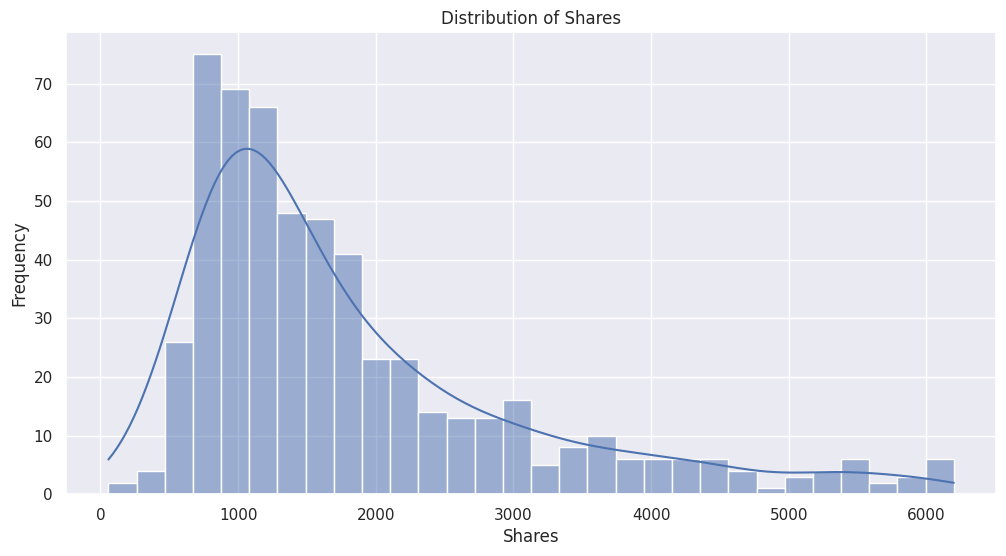

In [ ]:
# Univariate analysis for a numeric feature (e.g., 'shares')
plt.figure(figsize=(12, 6))
sns.histplot(df['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

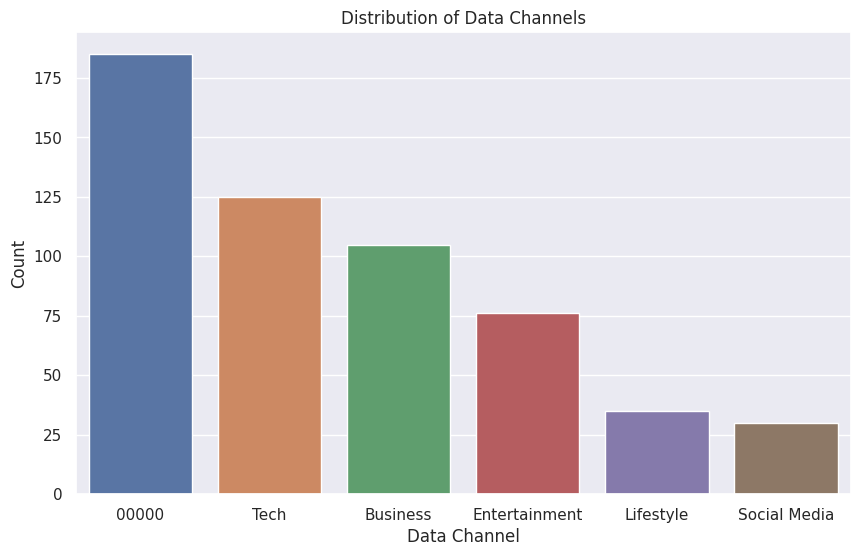

In [ ]:
# Univariate analysis for a categorical feature (e.g., 'data_channel')
plt.figure(figsize=(10, 6))
sns.countplot(x='data_channel', data=df, order=df['data_channel'].value_counts().index)
plt.title('Distribution of Data Channels')
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.show()

**Multivariate Analysis**

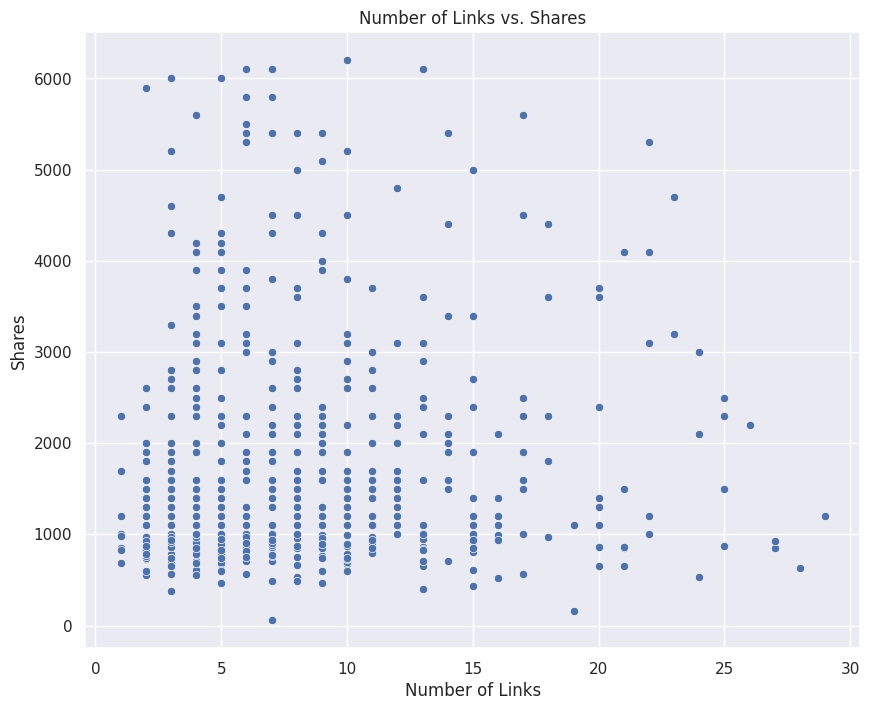

In [ ]:
# Multivariate analysis: Scatter plot for two numeric features (e.g., 'num_hrefs' and 'shares')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='hrefs', y='shares', data=df)
plt.title('Number of Links vs. Shares')
plt.xlabel('Number of Links')
plt.ylabel('Shares')
plt.show()

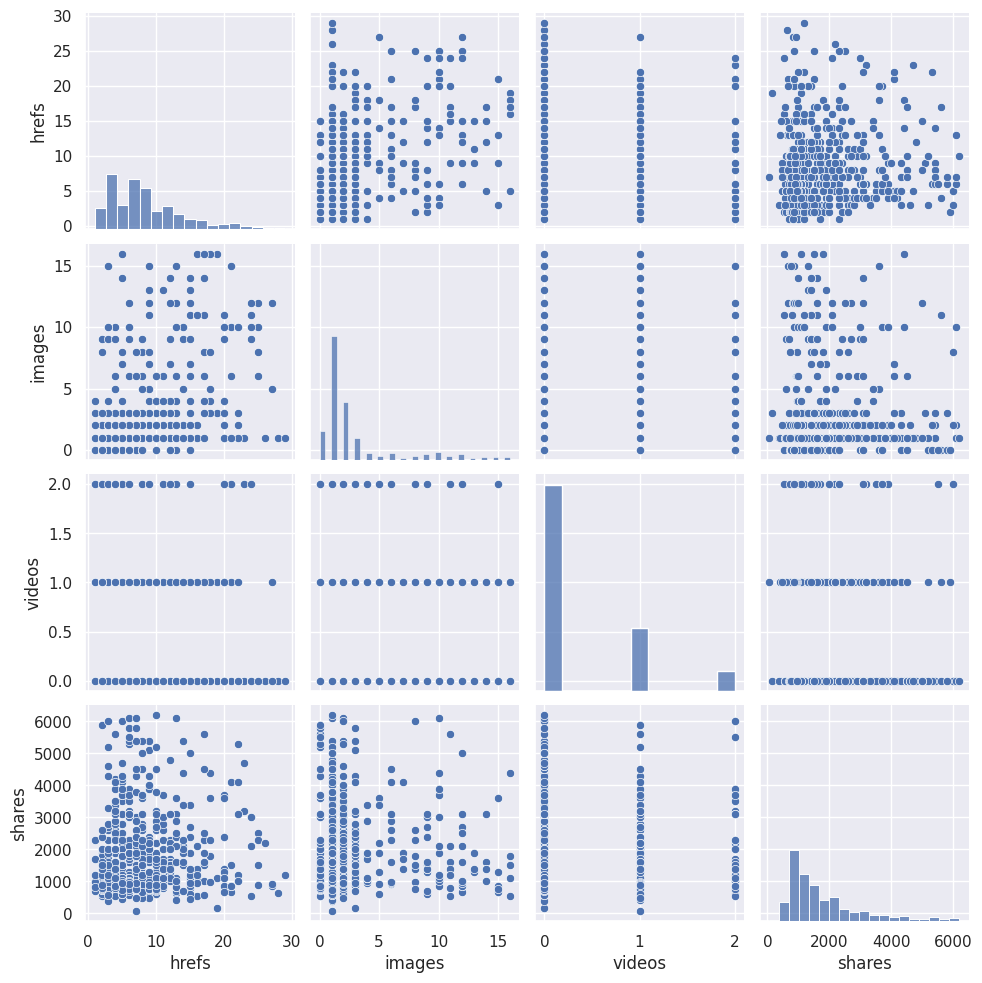

In [ ]:
sns.pairplot(df[['hrefs', 'images', 'videos', 'shares']])
plt.show()

<ipython-input-19-91739cd8df8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


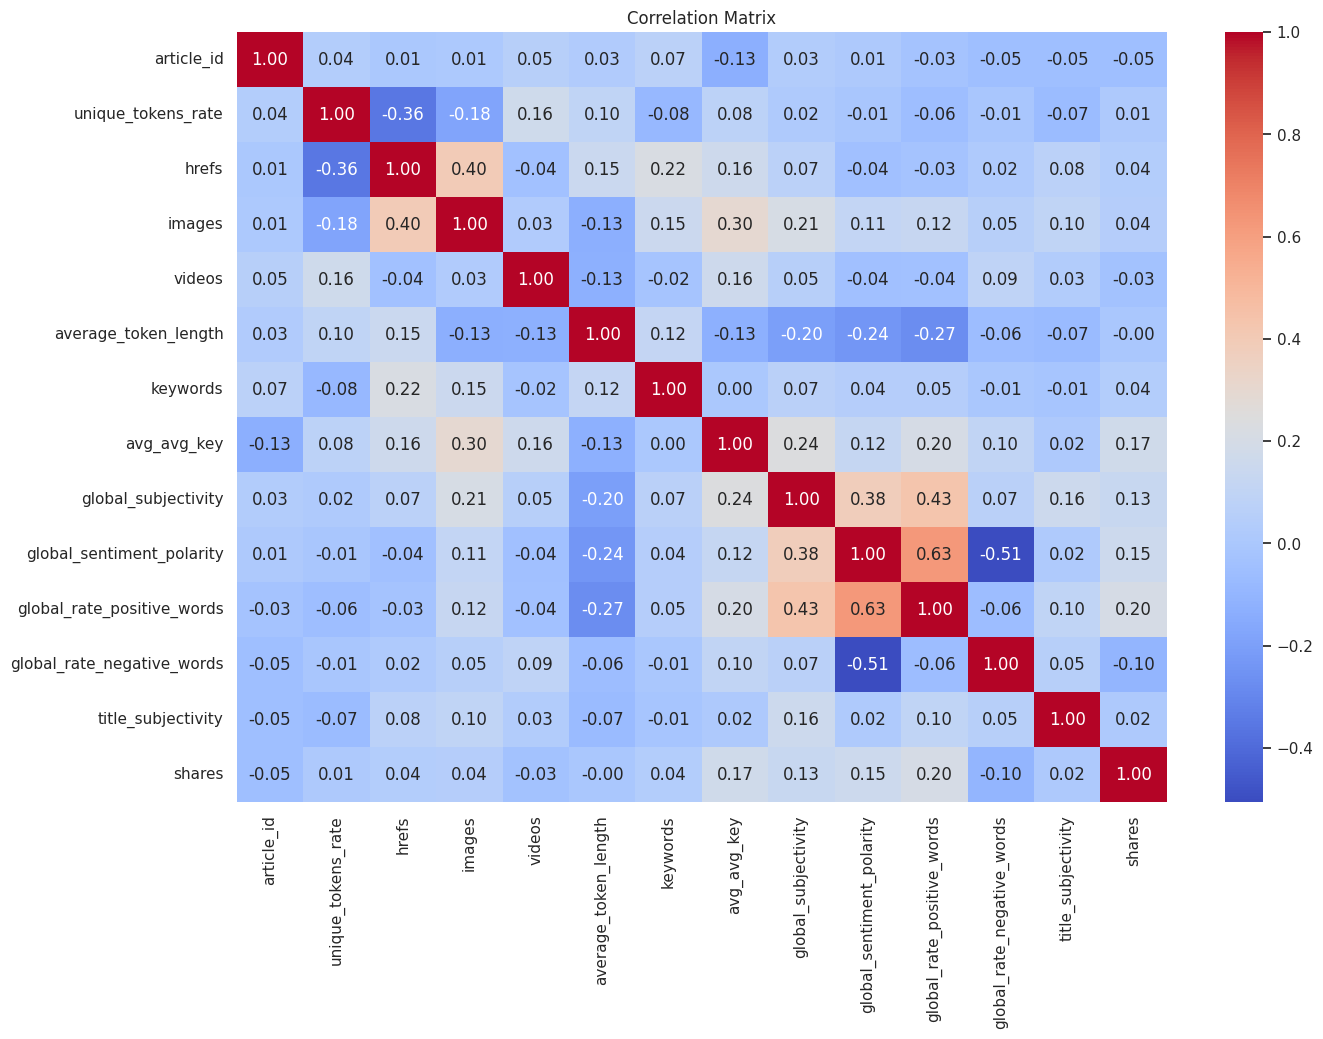

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()